In [12]:
def armamle(X, theta0, p):
    theta, logl = steepdescent(X, theta0, p)
    q = len(theta0) - 2 - p
    T = len(X)
    alpha, beta = theta[:p], theta[p:p + q]
    sigma, c = theta[p + q], theta[p + q + 1]
    e = np.zeros(T)
    m = max(p, q)
    for j in range(m, T):
        e[j] = X[j] - c - np.dot(alpha.T, X[j - p:j][::-1]) - np.dot(beta.T, e[j - q:j][::-1])
    res = e
    logl = -logl
    return theta, logl, res


#implementes the steepest descent algorithm
#finds the optimal set of parameters for the model
def steepdescent(Xx, theta0, p0):
    itr = 200
    maxi = 20
    tol = 1.0e-8
    lmbda = 1.0e-3
    j = 0
    th = theta0
    #likelihood
    Fnc = lharma(th, Xx, p0)
    #Gradient of ARMA
    grad = garma(th, Xx, p0)
    
    while (np.linalg.norm(grad) >= tol) & (j < itr):
        step = -grad
        gstp = np.dot(grad.T, step)
        gama = min(1, 1 / np.linalg.norm(step))
        i = 1
        while (lharma(th + gama * step, Xx, p0)) > (Fnc + gama * lmbda * gstp):
            i += 1
            gama = gama / 2
            if i > maxi:
                break
        th = th + gama * step
        Fnc = lharma(th, Xx, p0)
        grad = garma(th, Xx, p0)
        j += 1
    return th, Fnc


#Calculates the log-likelihood
def lharma(theta0, X, p):
    
    #assigning values to varables
    q = len(theta0) - 2 - p
    T = len(X)
    #exctracting the parameters from theta0
    #and assigning them to alhpa, beta, sigma, c.
    alpha, beta = theta0[:p], theta0[p:p + q]
    sigma, c = theta0[p + q], theta0[p + q + 1]
    y = 0
    #initialised to array of zeros
    e = np.zeros(T)
    #maximum of AR and MA coeff.
    m = max(p, q)
    #for-loop to calculate the residuals at each time-step of j
    for j in range(m, T):
        e[j] = X[j] - c - np.dot(alpha, X[j - p:j][::-1]) - np.dot(beta, e[j - q:j][::-1])
        y += e[j] ** 2
    #normalised with the noise sigma
    y = y / (2 * sigma ** 2)
    #log-likelihood is calculated and returned
    y += np.log(sigma ** 2) * (T - m) / 2 + np.log(2 * np.pi) * (T - m) / 2
    return y

#computes the gradient of the lharma function
#so it takes gradient of the log-likelihood function
def garma(theta0, X, p):
    h = 0.0001
    nw = len(theta0)
    gval = np.zeros(nw)
    for i in range(nw):
        xph = theta0.copy()
        xph[i] = theta0[i] + h
        fxph = lharma(xph, X, p)
        xmh = theta0.copy()
        xmh[i] = theta0[i] - h
        fxmh = lharma(xmh, X, p)
        gval[i] = (fxph - fxmh) / (2 * h)
    return gval


[1.16895, 1.18247, 1.20806, 1.23076, 1.25174, 1.27098, 1.28472, 1.29049, 1.28861, 1.27187, 1.24025, 1.19928, 1.14812, 1.09323, 1.04099, 0.9902, 0.94339, 0.89458, 0.84568, 0.79839, 0.75026, 0.70266, 0.65637, 0.61192, 0.57012, 0.5318, 0.49754, 0.46885, 0.44777, 0.43652, 0.43898, 0.45867, 0.49627, 0.55053, 0.61655, 0.6896, 0.76312, 0.83128, 0.89018, 0.93769, 0.97328, 0.99744, 1.01131, 1.01635, 1.01413, 1.00644, 0.99532, 0.98307, 0.97254, 0.96698, 0.96945, 0.98233, 1.00644, 1.04044, 1.07944, 1.11512, 1.13926, 1.14827, 1.14387, 1.13051, 1.11291, 1.09503, 1.07984, 1.06927, 1.06421, 1.06447, 1.06873, 1.07464, 1.07904, 1.0781, 1.0677, 1.04462, 1.00874, 0.964, 0.91625, 0.87069, 0.83094, 0.79912, 0.77607, 0.76142, 0.75371, 0.75074, 0.75, 0.74924, 0.74692, 0.7426, 0.73707, 0.73244, 0.73219, 0.74099, 0.76338, 0.80092, 0.85015, 0.9044, 0.95761, 1.00633, 1.04951, 1.08748, 1.12105, 1.15101, 1.17791, 1.20205, 1.22357, 1.24253, 1.25903, 1.27338, 1.28627, 1.2988, 1.31198, 1.32527, 1.33476, 1.33369, 1.31

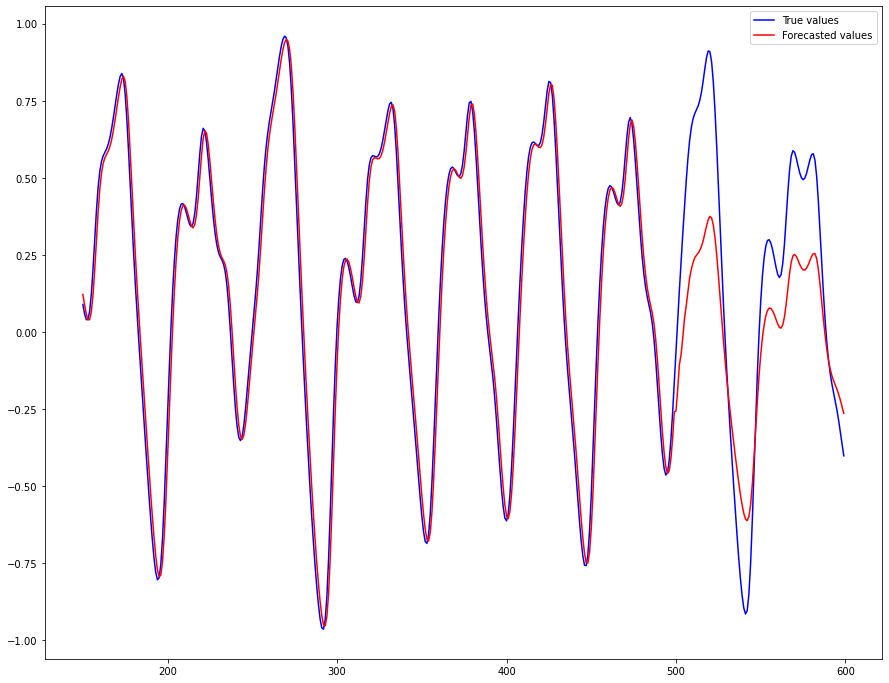

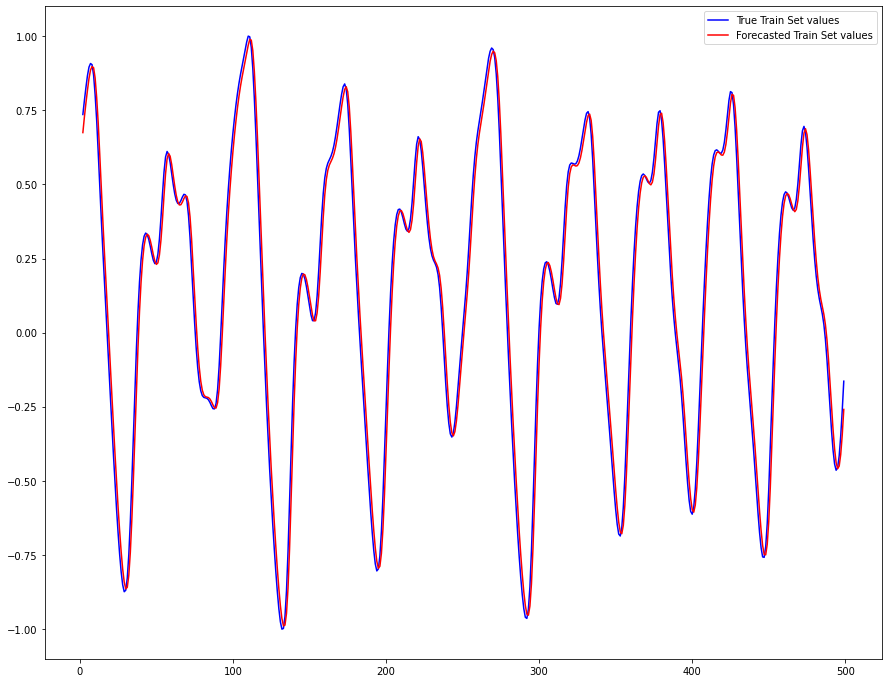

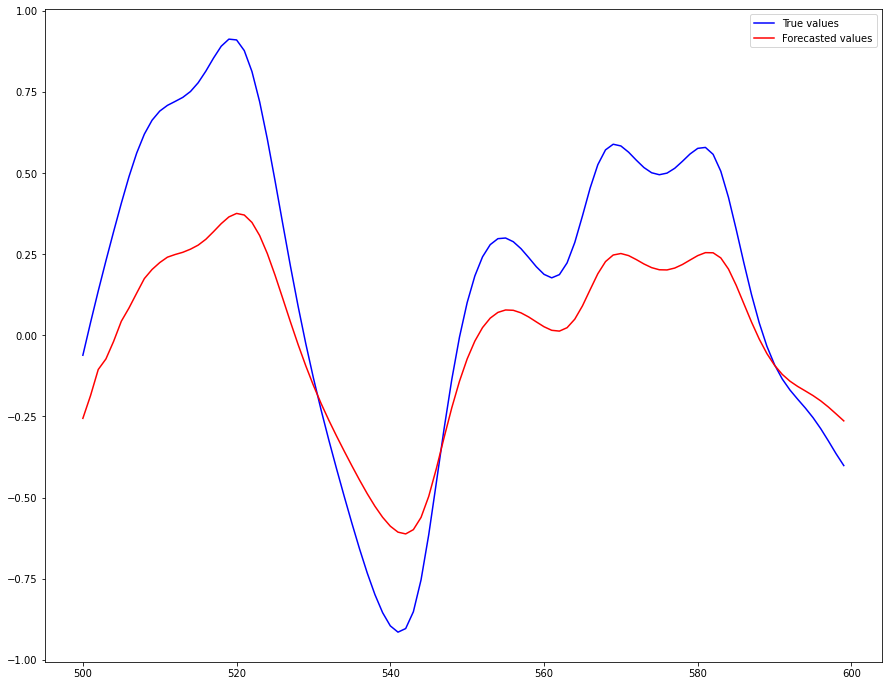

Mean Squared Error: 0.005180100699510617
sum Squared Error: 2.579690148356287


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math


#MACKEY-GLASS TIME SERIES

#variable declaration
tMin = 20
tMax = 650
beta = 0.2
gamma = 0.1
tao = 17

#array initialization with values

xy = np.array([0.401310, 0.953833, 0.174821, 0.572708, 0.971513, 0.109872, 0.388265,
               0.942936, 0.213617, 0.666899, 0.881914, 0.413442, 0.962755, 0.142354,
               0.484694, 0.991570, 0.033185, 0.127373, 0.441263, 0.978804])

#initialising the array
x1 = []


#appending values into the array
for i in range(0, tMin):
    x1.append(xy[i])
    

#creating the mackey-glass time series values    
for t in range(tMin, tMax):
    mackay = x1[t-1] + (beta * x1[t-tao-1] / (1 + math.pow(x1[t-tao-1], 10))) - (gamma * x1[t-1])
    mackay = round(mackay, 5)
    x1.append(mackay)  

#removing the first 50 values from the array
x1 = x1[50:]
print(x1)


#Assigning the value of matrix x to numsArray
numsArray = x1[:(tMax-50)]

print(len(numsArray),"\n")
normArray = numsArray

# finding the minimum value of normArray
ymin = np.min(normArray)
print(ymin,"\n")

# finding the maximum value of normArray
ymax = np.max(normArray) 
print(ymax,"\n")


#print length
print(len(numsArray),"\n")

#normalisation by min-max scaling
numsArray = 2.0*((normArray-ymin)/(ymax-ymin)-0.5)

print(len(x1))


#initialising variables
T = 500
n = 100
#initialising the AR and MA components for arma(1,2) model
p = 1
q = 2
m = max(p,q)

#assigning numsArray value to X
X = numsArray

#shape of X
print(X.shape,"\n")

#initialising coefficients for ARMA model
theta0 = np.array([0.5, 0.4, 0.3, 0.8, 0.01]).T

#Calling the armamle function to estimate the model parameters
theta, logl, res = armamle(X[:T], theta0, p)


print("Model Estimates")

print("\n",theta,"\n")

#assigning parameters from theta to alpha, beta, sigma
#and initialising c = 0
alpha = theta[:p]
beta = theta[p:p + q]
sigma = theta[p + q]
c = 0

#initialsing array y & er to zeros
y = np.zeros(T + n)
er = np.zeros(T + n)

#looping over from m to T
#to run predictions for the arma model
for j in range(m, T):
    y[j] = c + (alpha.T).dot(X[j - p:j][::-1]) + (beta.T).dot(er[j - q:j][::-1])

#looping over from T to T+n
#to generate error and predictions for the arma model
for j in range(T, T + n):
    y[j] = c + (alpha.T).dot(y[j - p:j][::-1]) + (beta.T).dot(er[j - q:j][::-1])
    er[j] = X[j] - c - (alpha.T).dot(X[j - p:j][::-1]) - (beta.T).dot(er[j - q:j][::-1])

#plotting all the results 
plt.figure(figsize=(15,12))
plt.plot(range(150, T + n), X[150:T + n], 'b', label="True values")
plt.plot(range(150, T + n), y[150:T + n], 'r', label="Forecasted values")
plt.legend()
plt.show()

#plotting results for arma model for iteration m to T
plt.figure(figsize=(15,12))
plt.plot(range(m, T), X[m:T], 'b', label="True Train Set values")
plt.plot(range(m, T), y[m:T], 'r', label="Forecasted Train Set values")
plt.legend()
plt.show()

#plotting results for arma model for iteration T to T+n
plt.figure(figsize=(15,12))
plt.plot(range(T, T + n), X[T:T + n], 'b', label="True values")
plt.plot(range(T, T + n), y[T:T + n], 'r', label="Forecasted values")
plt.legend()
plt.show()

mse = np.mean((y[m:T] - X[m:T])**2)
print("Mean Squared Error:", mse)

sse = mse * (T - m)
print("sum Squared Error:", sse)

